In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
plt.style.use('ggplot')
sns.set_palette('viridis')

In [2]:
# Load the dataset
try:
    df = pd.read_csv('../data/raw/training.csv')
    print("Data loaded successfully!")
except FileNotFoundError:
    print("Error: training.csv not found in data/raw/. Please download it from Kaggle.")

# Display the first few rows
df.head()

Data loaded successfully!


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [3]:
# Get a concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [4]:
# Convert TransactionStartTime to datetime
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])

# Check for duplicate transactions
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


In [5]:
# Get summary statistics for numerical columns
df.describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


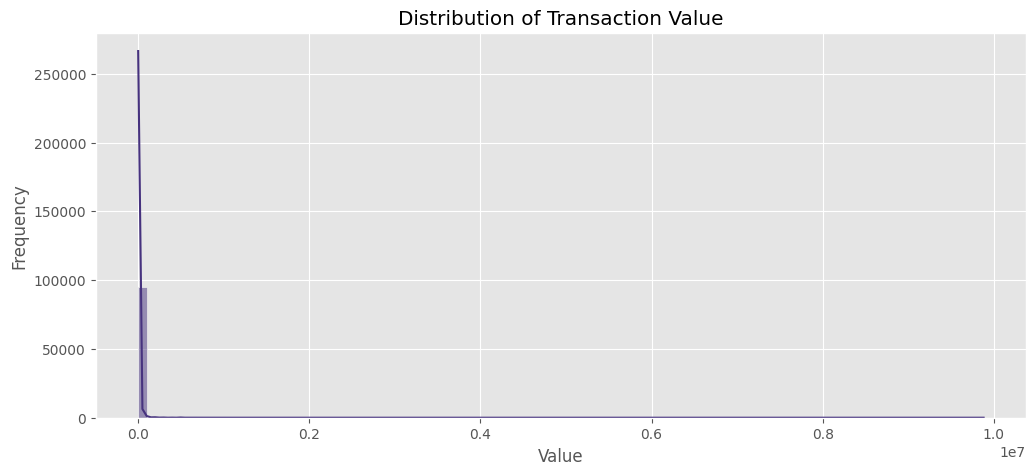

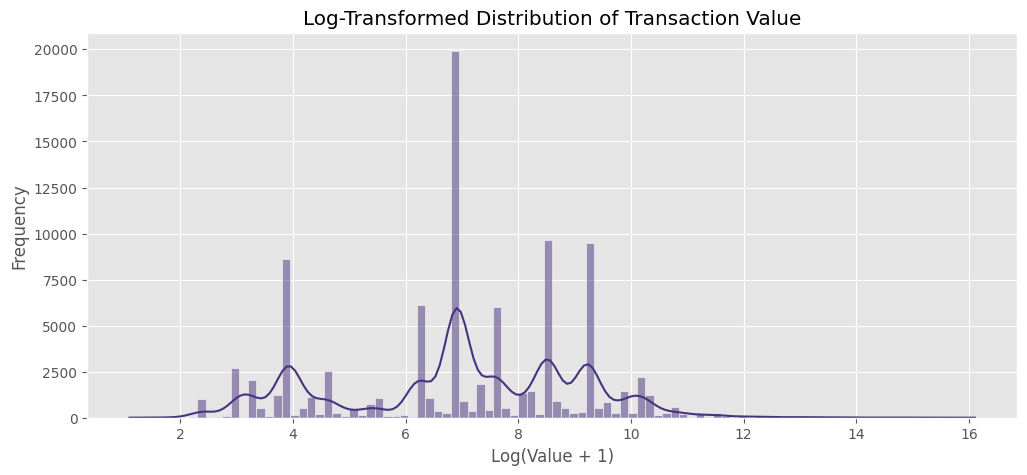

In [6]:
# Plot distribution of the 'Value' column
plt.figure(figsize=(12, 5))
sns.histplot(df['Value'], bins=100, kde=True)
plt.title('Distribution of Transaction Value')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Since it's skewed, let's view it on a log scale
plt.figure(figsize=(12, 5))
sns.histplot(np.log1p(df['Value']), bins=100, kde=True)
plt.title('Log-Transformed Distribution of Transaction Value')
plt.xlabel('Log(Value + 1)')
plt.ylabel('Frequency')
plt.show()

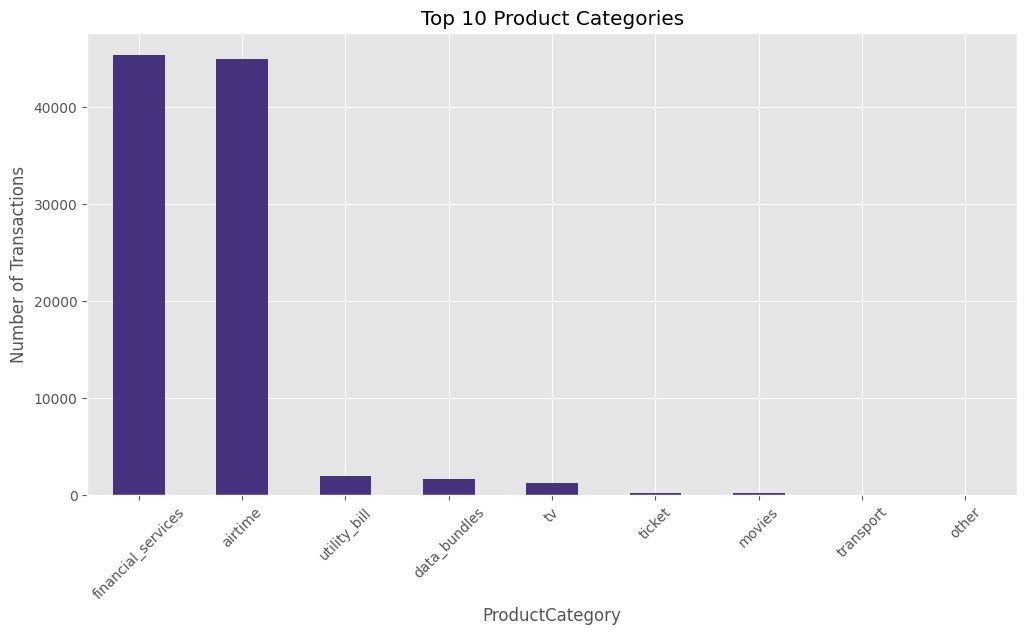

In [7]:
# Plot distribution of top 10 Product Categories
plt.figure(figsize=(12, 6))
df['ProductCategory'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 Product Categories')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

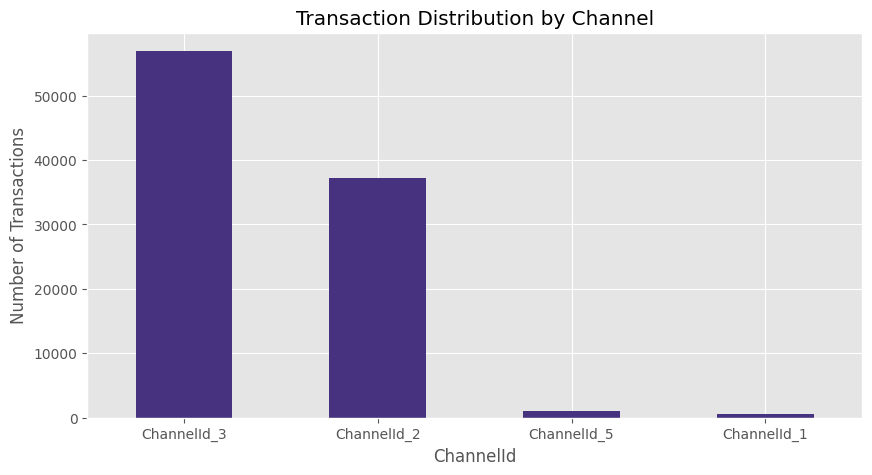

In [8]:
# Plot distribution of Channel ID
plt.figure(figsize=(10, 5))
df['ChannelId'].value_counts().plot(kind='bar')
plt.title('Transaction Distribution by Channel')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.show()

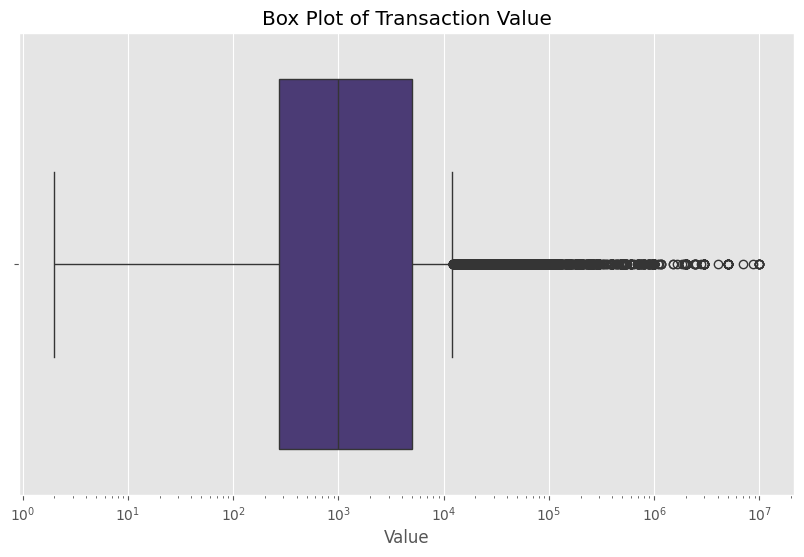

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Value'])
plt.title('Box Plot of Transaction Value')
plt.xscale('log') # Use a log scale to make it readable
plt.show()